---
# Proyecto 1 Mineria de Datos

### Integrantes:
Benjamin Cordero\
Jaime Torres\
Camila Retamales\
Jose Flores\
Joaquin Cortes


---


In [456]:
#Librerias
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plotnine import*
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

CUSTID : Identification of Credit Card holder (Categorical)
<br>
<br>
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
<br>
<br>
PURCHASES : Amount of purchases made from account
<br>
<br>
ONEOFFPURCHASES : Maximum purchase amount done in one-go
<br>
<br>
INSTALLMENTSPURCHASES : Amount of purchase done in installment
<br>
<br>
CASHADVANCE : Cash in advance given by the user
<br>
<br>
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
<br>
<br>
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
<br>
<br>
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
<br>
<br>
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
<br>
<br>
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
<br>
<br>
PURCHASESTRX : Numbe of purchase transactions made
<br>
<br>
CREDITLIMIT : Limit of Credit Card for user
<br>
<br>
PAYMENTS : Amount of Payment done by user
<br>
<br>
MINIMUM_PAYMENTS : Minimum amount of payments made by user
<br>
<br>
PRCFULLPAYMENT : Percent of full payment paid by user
<br>
<br>
TENURE : Tenure of credit card service for user

In [457]:
#Base de Datos
#path
filepath = os.getcwd() + os.path.sep + "CC-GENERAL.csv"
df = pd.read_csv(filepath,delimiter=',')
display(df.head())
print(f"DataFrame de {df.shape[0]} filas y {df.shape[1]} columnas.")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


DataFrame de 8950 filas y 18 columnas.


## Analisis exploratorio de los datos

In [458]:
#Tipo de variable en cada columna y cantidad de valores no nulos NaN por columna
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [459]:
#Cantidad de valores atípicos NaN por columna
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [460]:
df[df["CREDIT_LIMIT"].isna()==True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [461]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [467]:
#Se tratan los valores NaN
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

(8949, 17)

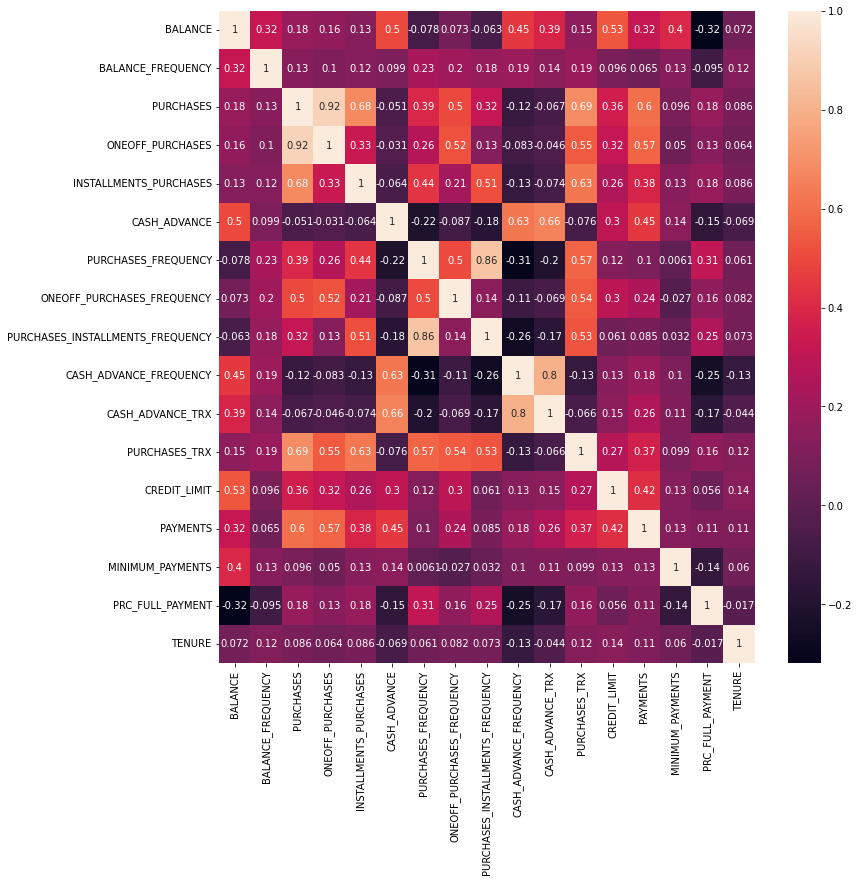

In [463]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='BALANCE'>

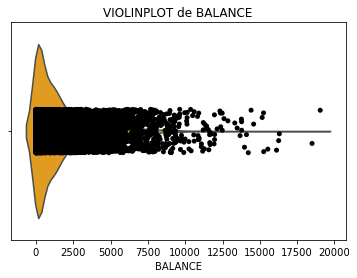

<AxesSubplot:xlabel='BALANCE_FREQUENCY'>

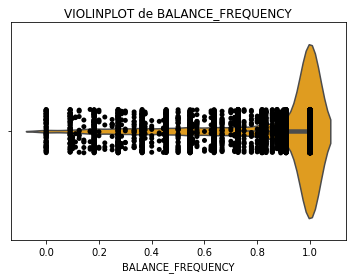

<AxesSubplot:xlabel='PURCHASES'>

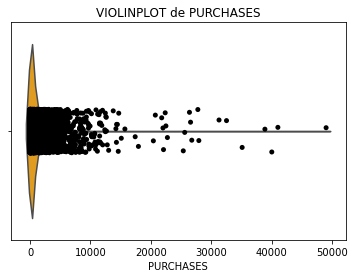

<AxesSubplot:xlabel='ONEOFF_PURCHASES'>

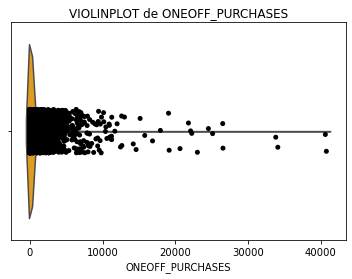

<AxesSubplot:xlabel='INSTALLMENTS_PURCHASES'>

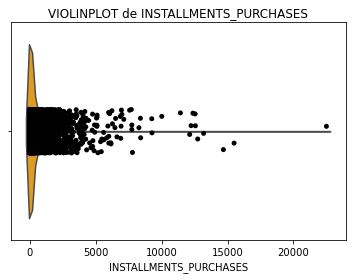

<AxesSubplot:xlabel='CASH_ADVANCE'>

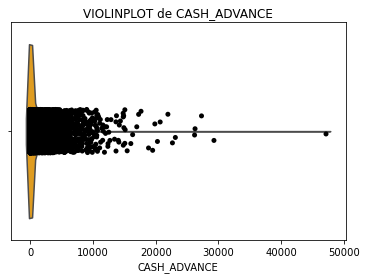

<AxesSubplot:xlabel='PURCHASES_FREQUENCY'>

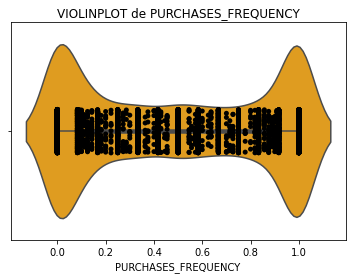

<AxesSubplot:xlabel='ONEOFF_PURCHASES_FREQUENCY'>

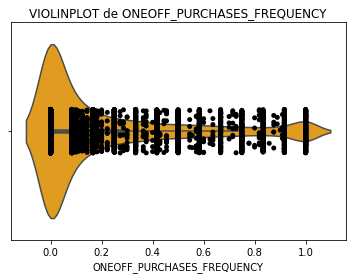

<AxesSubplot:xlabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

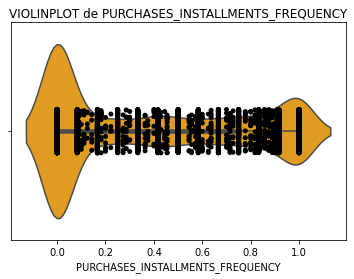

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY'>

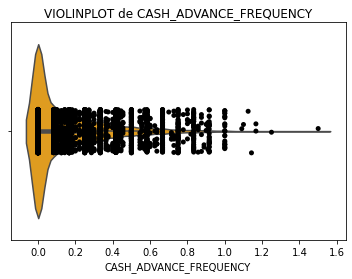

<AxesSubplot:xlabel='CASH_ADVANCE_TRX'>

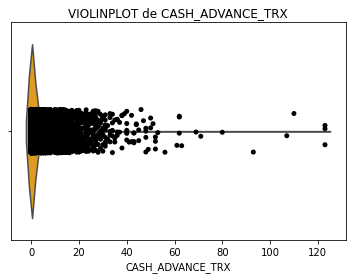

<AxesSubplot:xlabel='PURCHASES_TRX'>

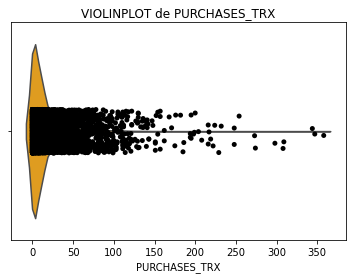

<AxesSubplot:xlabel='CREDIT_LIMIT'>

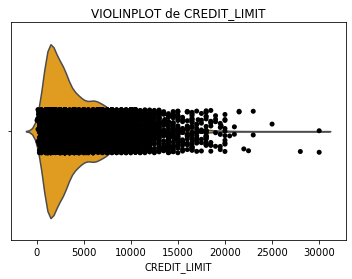

<AxesSubplot:xlabel='PAYMENTS'>

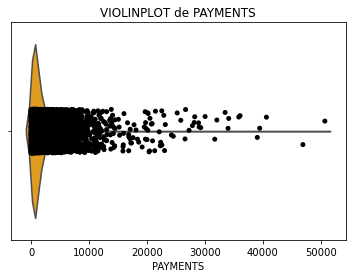

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

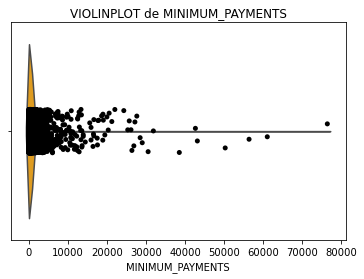

<AxesSubplot:xlabel='PRC_FULL_PAYMENT'>

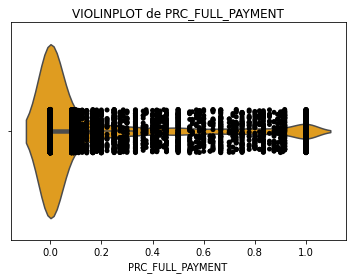

<AxesSubplot:xlabel='TENURE'>

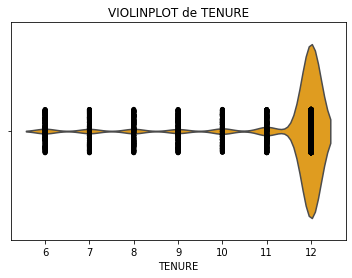

In [464]:
#Violinplot para cada columna
df.drop('CUST_ID', inplace=True, axis=1)
for i in df.columns:
    display(sns.violinplot(x=df[i],color='orange'))
    sns.stripplot(data=df, x=i,color = 'black')
    plt.title(f"VIOLINPLOT de {i}")
    plt.show()

## K-Means:


In [465]:
#Como se encuentran las columnas en diferentes escalas:
scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
scaled_features = scaler.fit_transform(df) #estandarización los datos (media 0, varianza 1)

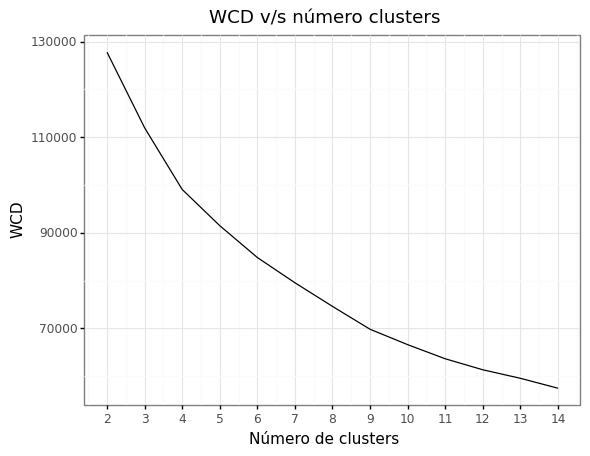

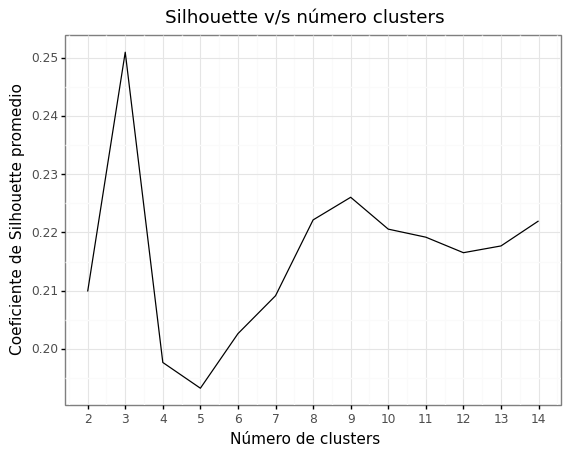

In [466]:
#Determinando número de K clusters:
maxK=15
sse = np.zeros(maxK-2) # NO USAR []
CS = np.zeros(maxK-2) # NO USAR []
for k in range(2, maxK):
    kmeans = KMeans(n_clusters=k,random_state=1,n_init=10)
    kmeans.fit(scaled_features)
    sse[k-2]=kmeans.inertia_ #NO USAR sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    CS[k-2]=silhouette_avg #NO USAR CS.append(silhouette_avg)
    
#Generating the dataframa
tempData=pd.DataFrame(range(2, maxK),columns=["K"])
tempData["sse"]=sse
tempData["CS"]=CS
print(ggplot(tempData)+aes(x="K",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
+scale_x_continuous(breaks=range(1,maxK))+ggtitle("WCD v/s número clusters"))

print(ggplot(tempData)+aes(x="K",y="CS")+theme_bw()+geom_line()+labs(x="Número de clusters",y="Coeficiente de Silhouette promedio")
+scale_x_continuous(breaks=range(1,maxK))+ggtitle("Silhouette v/s número clusters"))    
